# Steps that we are going to follow in time series (Forecasting )

### 1.Data extraction
### 2.EDA of the data
### 3.Processing of the data
### 4.Model Building
### 5.Model Evalution

In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import sys 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/Achintya.K/Downloads/INFY.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-14,1575.150024,1591.400024,1568.449951,1585.300049,1523.786377,4908813
1,2022-11-15,1577.849976,1597.849976,1572.750000,1594.000000,1532.148804,3497614
2,2022-11-16,1597.150024,1609.000000,1593.500000,1602.800049,1540.607300,4497697
3,2022-11-17,1597.199951,1602.800049,1582.949951,1587.400024,1525.804810,3469515
4,2022-11-18,1591.699951,1598.000000,1575.500000,1593.400024,1531.572021,3126064


### EDA

In [10]:
stock_data = data[['Date','Close']]
stock_data

,Date,Close
0,2022-11-14,1585.300049
1,2022-11-15,1594.000000
2,2022-11-16,1602.800049
3,2022-11-17,1587.400024
4,2022-11-18,1593.400024
...,...,...
244,2023-11-07,1404.300049
245,2023-11-08,1391.000000
246,2023-11-09,1374.800049
247,2023-11-10,1368.849976


In [11]:
# convert Date column to datetime datatype

pd.to_datetime(stock_data.Date)
stock_data['Date'] = pd.to_datetime(stock_data.Date)


# now check the updated info()
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Close   249 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [12]:
# set the date as a index
stock_data = stock_data.set_index('Date')


In [13]:
stock_data

,Close
Date,
2022-11-14,1585.300049
2022-11-15,1594.000000
2022-11-16,1602.800049
2022-11-17,1587.400024
2022-11-18,1593.400024
...,...
2023-11-07,1404.300049
2023-11-08,1391.000000
2023-11-09,1374.800049


In [14]:
stock_data.describe()

,Close
count,249.000000
mean,1429.595987
std,110.068519
min,1223.400024
25%,1345.150024
50%,1427.599976
75%,1509.300049
max,1657.099976


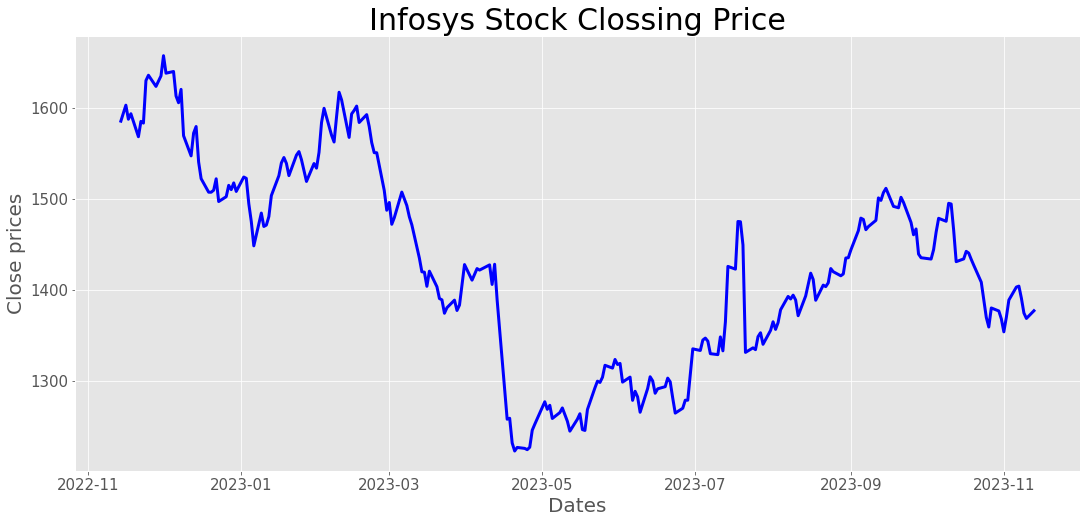

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize= (20))
plt.xticks(fontsize = 15)
plt.ylabel('Close prices', fontsize = 20)
plt.yticks(fontsize= 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Infosys Stock Clossing Price', fontsize= 30 )
plt.show()

In [17]:
# Rolling mean 
stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [18]:
# check the rolling mean 
rolmean = stock_data['Close'].rolling(12).mean()
rolmean

Date
2022-11-14            NaN
2022-11-15            NaN
2022-11-16            NaN
2022-11-17            NaN
2022-11-18            NaN
                 ...     
2023-11-07    1384.345856
2023-11-08    1381.325022
2023-11-09    1378.504191
2023-11-10    1378.404185
2023-11-13    1379.891693
Name: Close, Length: 249, dtype: float64

In [19]:
# Check the rolling standard deviation
rolstd = stock_data['Close'].rolling(12).std()
rolstd

Date
2022-11-14          NaN
2022-11-15          NaN
2022-11-16          NaN
2022-11-17          NaN
2022-11-18          NaN
                ...    
2023-11-07    22.303629
2023-11-08    18.004992
2023-11-09    15.858498
2023-11-10    15.920322
2023-11-13    14.781521
Name: Close, Length: 249, dtype: float64

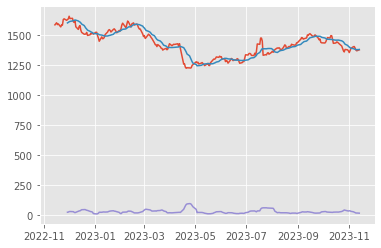

In [20]:
# now plot those values
plt.plot(stock_data.Close)   ##time series data
plt.plot(rolmean)   ## rolling mean
plt.plot(rolstd)      ## rolling std


In [21]:
rolmean = stock_data['Close'].rolling(30).mean()    ## smoothning by changing the rolling mean values

rolstd = stock_data['Close'].rolling(30).std() 

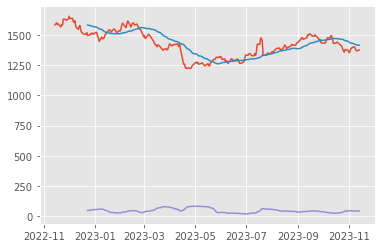

In [22]:
# now plot those values after smothining
plt.plot(stock_data.Close)   ##time series data
plt.plot(rolmean)   ## rolling mean
plt.plot(rolstd)      ## rolling std

#### Augmented Dickey Fuller test to check if the data is staionary 

In [23]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [24]:
adft

(-1.9567619607538151,
 0.30584713029027355,
 1,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2062.6848358737207)

In [25]:
pd.Series(adft[0:4], index= ['test stats', 'P-value', 'lag', 'data points'])

test stats      -1.956762
P-value          0.305847
lag              1.000000
data points    247.000000
dtype: float64

In [30]:
# creating a function where all stationarity details shuould be present

#Test for staionarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    #plt.ylim(1000,2000)
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for adft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

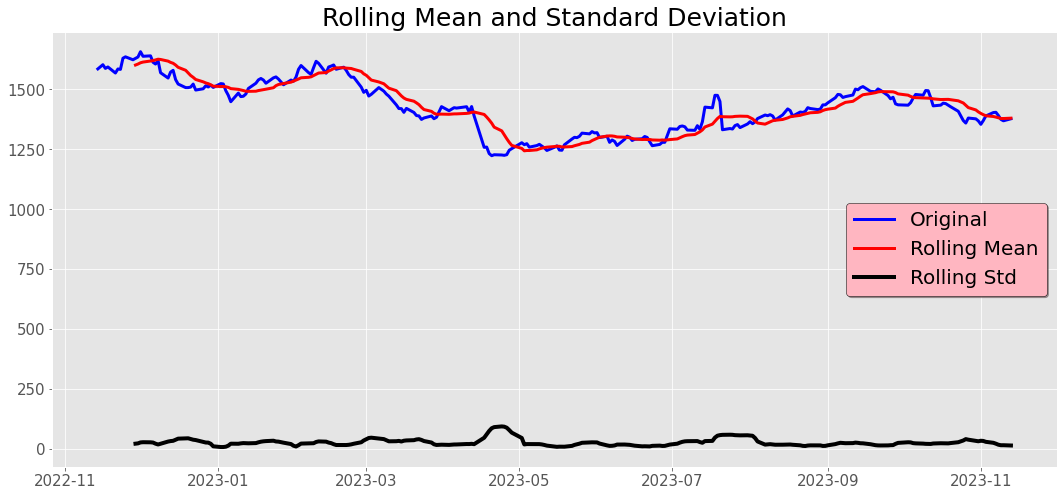

Results of dickey fuller test
Test Statistics                 -1.956762
p-value                          0.305847
No. of lags used                 1.000000
Number of observations used    247.000000
critical value (1%)             -3.457105
critical value (5%)             -2.873314
critical value (10%)            -2.573044
dtype: float64


In [31]:
test_stationarity(stock_data.Close)

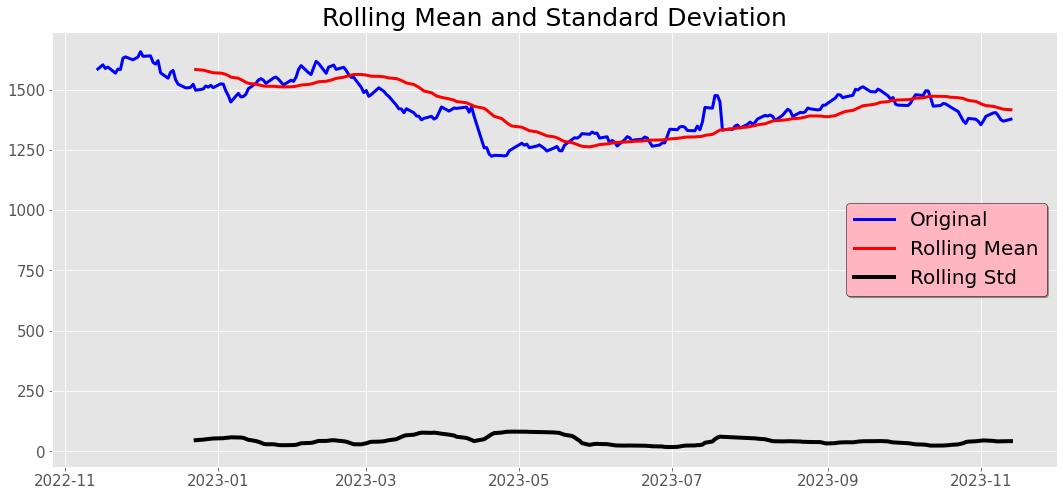

Results of dickey fuller test
Test Statistics                 -1.956762
p-value                          0.305847
No. of lags used                 1.000000
Number of observations used    247.000000
critical value (1%)             -3.457105
critical value (5%)             -2.873314
critical value (10%)            -2.573044
dtype: float64


In [83]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(30).mean() # rolling mean
    rolstd = timeseries.rolling(30).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(stock_data.Close)

In [47]:
df_close = stock_data['Close']
df_close

Date
2022-11-14    1585.300049
2022-11-15    1594.000000
2022-11-16    1602.800049
2022-11-17    1587.400024
2022-11-18    1593.400024
                 ...     
2023-11-07    1404.300049
2023-11-08    1391.000000
2023-11-09    1374.800049
2023-11-10    1368.849976
2023-11-13    1377.300049
Name: Close, Length: 249, dtype: float64

In [48]:
df_close.diff(2) 

Date
2022-11-14          NaN
2022-11-15          NaN
2022-11-16    17.500000
2022-11-17    -6.599976
2022-11-18    -9.400025
                ...    
2023-11-07    15.250000
2023-11-08   -12.300049
2023-11-09   -29.500000
2023-11-10   -22.150024
2023-11-13     2.500000
Name: Close, Length: 249, dtype: float64

In [49]:
df_close = df_close.diff()
df_close = df_close.dropna()

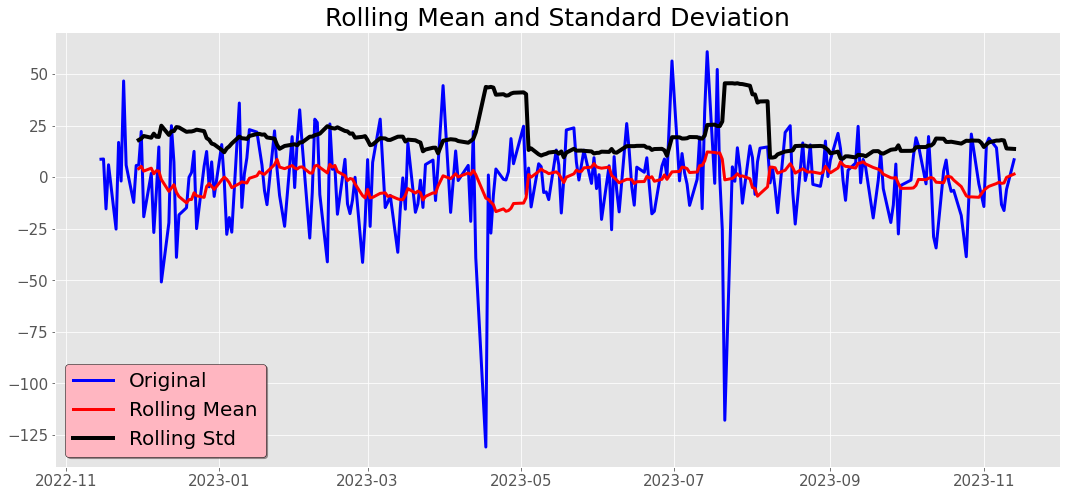

Results of dickey fuller test
Test Statistics               -1.418029e+01
p-value                        1.933895e-26
No. of lags used               0.000000e+00
Number of observations used    2.470000e+02
critical value (1%)           -3.457105e+00
critical value (5%)           -2.873314e+00
critical value (10%)          -2.573044e+00
dtype: float64


In [50]:
test_stationarity(df_close)

### Now the data is Stationary

#### Checking for outliers

<AxesSubplot:xlabel='Close'>

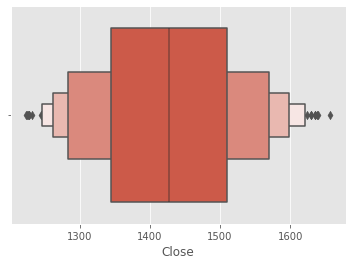

In [35]:
sns.boxenplot(stock_data.Close)

In [36]:
# finding the IQR
iqr_25 = stock_data.Close.quantile(0.25)
iqr_75 = stock_data.Close.quantile(0.75)

In [37]:
iqr = iqr_75 - iqr_25
iqr

164.1500249999999

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[['Close']], period= 12)
result

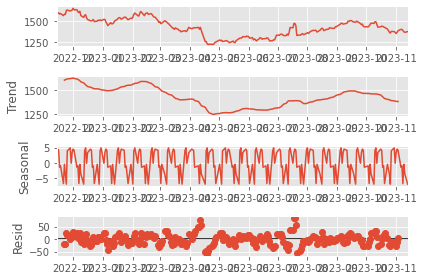

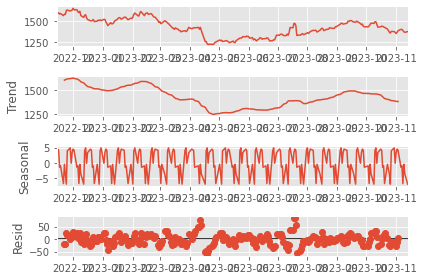

In [45]:
# plot the result 
result.plot()

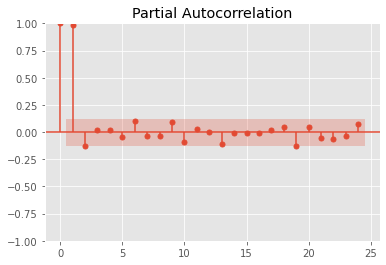

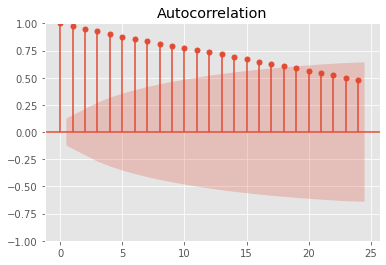

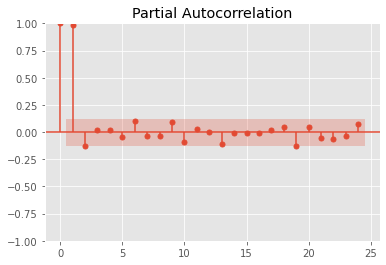

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

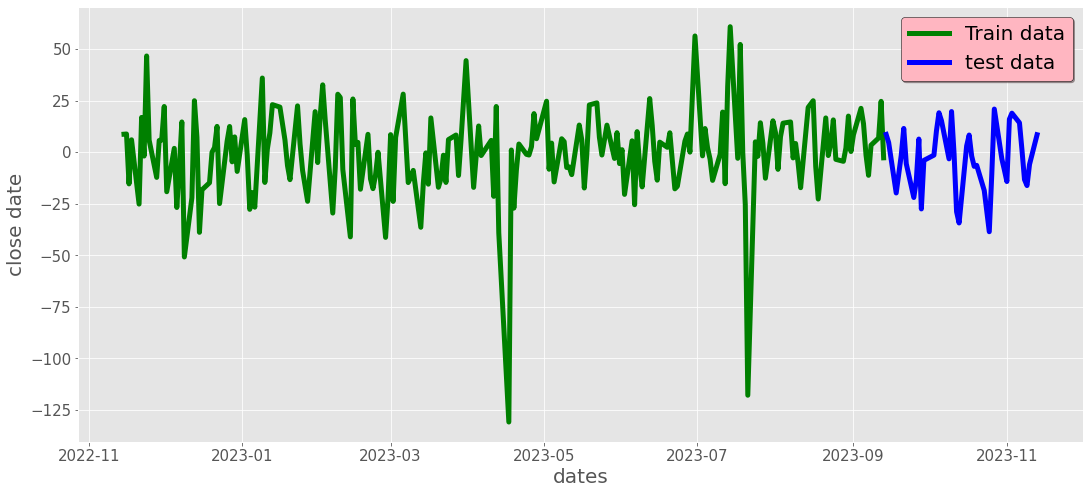

In [51]:
train_data = df_close[0:-40]
test_data = df_close[-40:] 
plt.figure(figsize= (18,8))
plt.grid(True)
plt.xlabel('dates', fontsize = 20 )
plt.ylabel('close date', fontsize = 20)
plt.xticks(fontsize = 15 )
plt.yticks(fontsize = 15 )
plt.plot(train_data, 'green', label = 'Train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

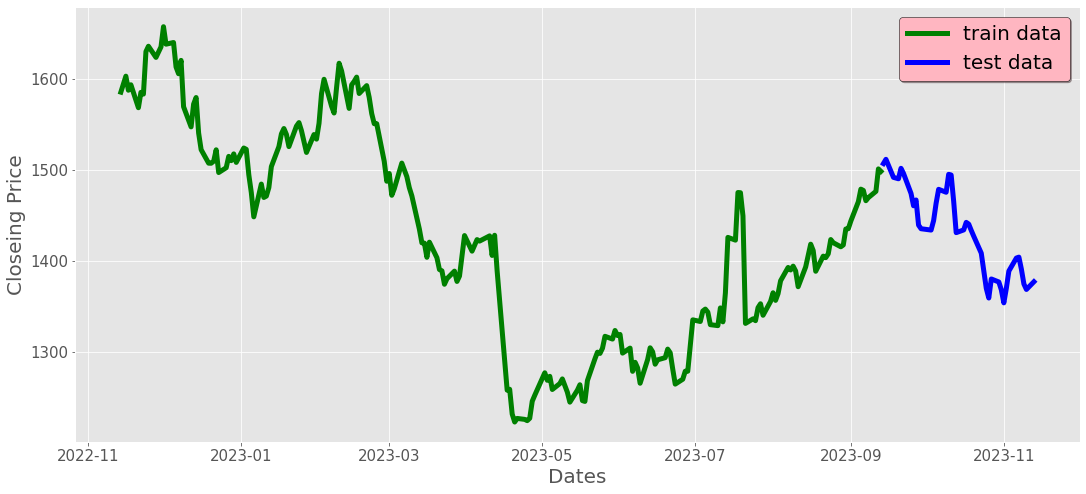

In [52]:
train_data = stock_data['Close'][0:-40]       ##train data
test_data = stock_data['Close'][-40:]           ## testing data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closeing Price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

In [53]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [54]:
history = [x for x in train_data]

In [72]:
model = ARIMA(history, order= (1,1,1) )  
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1100.649
Date:                Mon, 13 Nov 2023   AIC                           2207.299
Time:                        11:38:10   BIC                           2217.839
Sample:                             0   HQIC                          2211.542
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1656      0.537     -0.308      0.758      -1.219       0.887
ma.L1          0.2708      0.502      0.540      0.589      -0.712       1.254
sigma2       419.1675     22.465     18.659      0.000     375.137     463.198
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               857.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -1.44
Prob(H) (two-sided):                  0.73   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
model.forecast()

array([1378.2600493])

In [74]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

128.68990169834524

In [58]:
def train_arima_model(X, y, arima_order):
    history = [x for x in X]  ## prepare training dataset
    predictions = list()     ## make prediction list

    for t in range(len(y)):
        model  = ARIMA(history, order= arima_order)
        model_fit = model.fit()
        yhat  = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])

    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [59]:
## evaluate different combinations of p,d,q values for an ARIMA model to get the best order for ARIMA model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE= %.3f'  %(order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE= %.3f'  %(best_cfg, best_score))

In [60]:
import warnings
warnings.filterwarnings('ignore')

p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 47.919
ARIMA(0, 0, 1) RMSE= 28.253
ARIMA(0, 0, 2) RMSE= 20.761
ARIMA(0, 1, 0) RMSE= 15.381
ARIMA(0, 1, 1) RMSE= 14.949
ARIMA(0, 1, 2) RMSE= 14.920
ARIMA(0, 2, 0) RMSE= 17.672
ARIMA(0, 2, 1) RMSE= 15.439
ARIMA(0, 2, 2) RMSE= 14.936
ARIMA(1, 0, 0) RMSE= 15.367
ARIMA(1, 0, 1) RMSE= 14.800
ARIMA(1, 0, 2) RMSE= 14.796
ARIMA(1, 1, 0) RMSE= 14.995
ARIMA(1, 1, 1) RMSE= 14.929
ARIMA(1, 1, 2) RMSE= 14.910
ARIMA(1, 2, 0) RMSE= 18.490
ARIMA(1, 2, 1) RMSE= 14.979
ARIMA(1, 2, 2) RMSE= 14.970
ARIMA(2, 0, 0) RMSE= 14.907
ARIMA(2, 0, 1) RMSE= 14.805
ARIMA(2, 0, 2) RMSE= 14.710
ARIMA(2, 1, 0) RMSE= 14.909
ARIMA(2, 1, 1) RMSE= 14.943
ARIMA(2, 1, 2) RMSE= 14.804
ARIMA(2, 2, 0) RMSE= 17.683
ARIMA(2, 2, 1) RMSE= 14.913
ARIMA(2, 2, 2) RMSE= 14.995
Best ARIMA(2, 0, 2) RMSE= 14.710


In [61]:

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(1,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 15.367091343177997


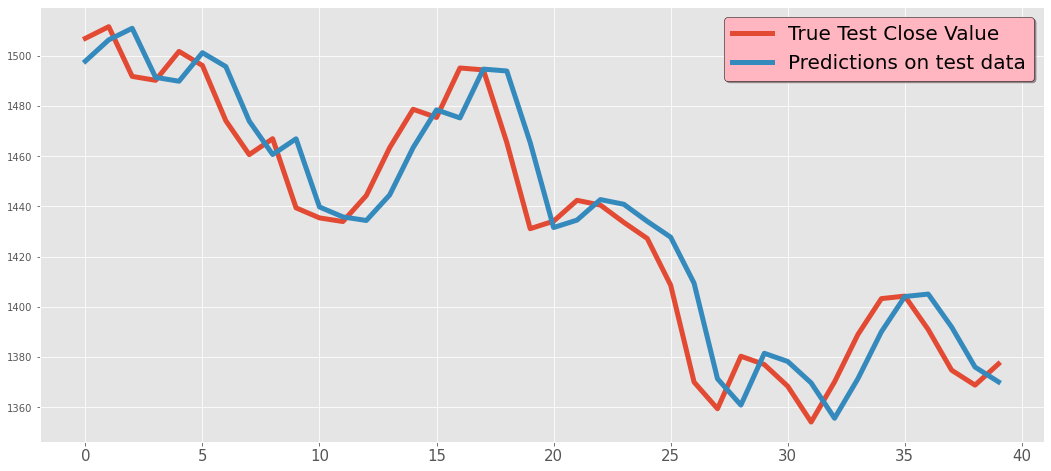

In [62]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [63]:
fc_series = pd.Series(predictions, index= test_data.index)

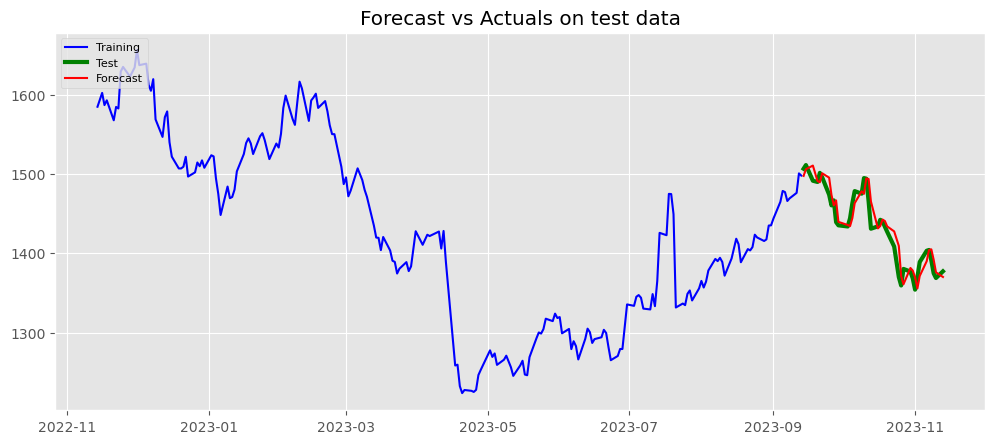

In [64]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

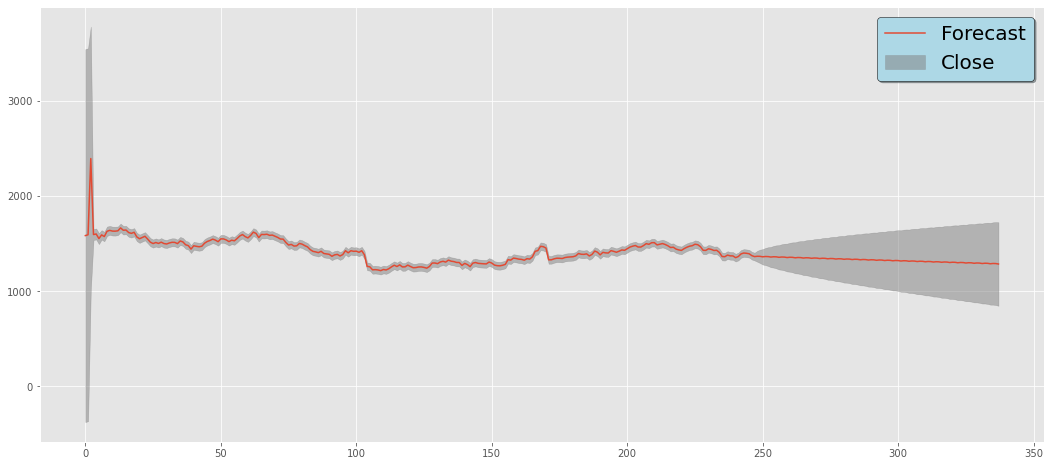

In [78]:
# now plotting forecast the future calues in the plot 
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+90, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [68]:
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MAPE: 0.04767633998320796


## With a MAPE of around 4.7%, the model is 95.3% accurate in predicting the next 90 observations.